In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random
%matplotlib inline

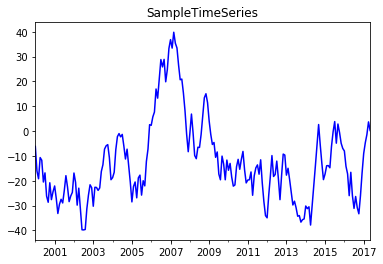

2000-01-31    -6.185987
2000-02-29   -16.034014
2000-03-31   -19.209481
2000-04-30   -10.667441
2000-05-31   -11.745630
2000-06-30   -20.509596
2000-07-31   -16.838063
2000-08-31   -26.200120
2000-09-30   -28.675667
2000-10-31   -20.818395
Freq: M, dtype: float64

In [13]:
random.seed(111)
rang = pd.date_range(start='2000', periods=209, freq='M')
ts = pd.Series(np.random.uniform(-10,10,size=len(rang)),rang).cumsum()
ts.plot(c='b',title="SampleTimeSeries")
plt.show()
ts.head(10)
               

In [22]:
TS = np.array(ts)
num_periods = 20
f_horizon = 1 # this has to be edited

x_data = TS[:(len(TS)-(len(TS) % num_periods))]
x_batches = x_data.reshape(-1,20,1)

y_data = TS[1:(len(TS)-(len(TS) % num_periods)) + f_horizon]
y_batches = y_data.reshape(-1,20,1)

print(len(x_batches))
print(x_batches.shape)
print(x_batches[0:2])

print(y_batches[0:1])
print(len(y_batches.shape))

10
(10, 20, 1)
[[[ -6.18598693]
  [-16.0340145 ]
  [-19.20948085]
  [-10.66744143]
  [-11.74562973]
  [-20.50959627]
  [-16.83806269]
  [-26.20011976]
  [-28.67566711]
  [-20.81839521]
  [-27.61020731]
  [-24.42352419]
  [-22.1117986 ]
  [-27.10353072]
  [-33.18959628]
  [-29.46393123]
  [-27.46874691]
  [-28.94503269]
  [-23.92189993]
  [-17.95910008]]

 [[-22.53376376]
  [-28.41602946]
  [-26.15955234]
  [-24.69389849]
  [-16.89493921]
  [-20.65927854]
  [-29.82877322]
  [-22.98801232]
  [-31.45067419]
  [-39.75521322]
  [-39.805979  ]
  [-39.63069849]
  [-31.34144257]
  [-25.83565516]
  [-21.63262432]
  [-22.80139277]
  [-30.26956552]
  [-22.63131409]
  [-22.70671877]
  [-23.88651125]]]
[[[-16.0340145 ]
  [-19.20948085]
  [-10.66744143]
  [-11.74562973]
  [-20.50959627]
  [-16.83806269]
  [-26.20011976]
  [-28.67566711]
  [-20.81839521]
  [-27.61020731]
  [-24.42352419]
  [-22.1117986 ]
  [-27.10353072]
  [-33.18959628]
  [-29.46393123]
  [-27.46874691]
  [-28.94503269]
  [-23.92189

In [ ]:
def test_data(series,forecast,num_periods):
    test_x_setup = TS[-(num_preiods + forecast):]
    